<a href="https://colab.research.google.com/github/channeladam/MOOCs/blob/master/SchoolOfAI/DataLit/Week05/DataLit_W5_3_Logistic_Regression_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Details

https://www.kaggle.com/johnolafenwa/us-census-data/version/1

1. The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values “>50K” and “<=50K” and evaluate the accuracy of the classifier with the test dataset.

2. Apply sklearn or your favorite ML library’s inbuilt logistic regression model for prediction.

3. In this assignment, you are expected to implement logistic regression and get a good understanding of the key components of logistic regression:

  * hypothesis function
  * cost function
  * decision boundary
  * gradient descent algorithm

Finally, compare the result you got from built-in model versus your own implementation on various metrics.

In [0]:
import pandas as pd
import numpy as np

import scipy as sp
from scipy.stats import norm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.core.pylabtools import figsize

import warnings
warnings.filterwarnings('ignore')

# Data Acquisition

In [4]:
!wget -N "https://raw.githubusercontent.com/channeladam/MOOCs/master/SchoolOfAI/DataLit/Week05/data/adult-training.csv"

--2019-03-05 15:09:13--  https://raw.githubusercontent.com/channeladam/MOOCs/master/SchoolOfAI/DataLit/Week05/data/adult-training.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [text/plain]
Saving to: ‘adult-training.csv’

adult-training.csv  100%[===================>]   3.79M  --.-KB/s    in 0.07s   

Last-modified header missing -- time-stamps turned off.
2019-03-05 15:09:13 (56.7 MB/s) - ‘adult-training.csv’ saved [3974305/3974305]



# Exploratory Data Analysis


Data dictionary: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Note that the dataset is made up of categorical and continuous features. 
It also contains missing values.

The categorical columns are: workclass, education, marital_status, occupation, relationship, race, gender, native_country

The continuous columns are: age, education_num, capital_gain, capital_loss, hours_per_week

*flnwgt*

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights. 


In [0]:
train = pd.read_csv('adult-training.csv')

In [6]:
train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [0]:
# Ah, no headings...

columns = ["age", "workclass", "fnlwgt", "education", "education_num", 
           "marital_status", "occupation", "relationship", "race", "gender", 
           "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_bracket"]

cat_cols = ["workclass", "education", "marital_status", "occupation","relationship", "race", "gender", "native_country"]
cont_cols = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

target_col_name = 'income_bracket'

In [0]:
train = pd.read_csv('adult-training.csv', names=columns, skipinitialspace=True)

In [9]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Hmm, we are told it contains missing values... but the columns are non-null

In [11]:
train['workclass'].unique()


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
train['education'].unique()


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [13]:
train['marital_status'].unique()


array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [14]:
train['occupation'].unique()


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [15]:
train['relationship'].unique()


array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [16]:
train['race'].unique()


array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [17]:
train['gender'].unique()


array(['Male', 'Female'], dtype=object)

In [18]:
train['native_country'].unique()


array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [19]:
train['income_bracket'].unique()


array(['<=50K', '>50K'], dtype=object)

Columns with missing data in the form of question marks '?' 

workclass
occupation
native_country

In [0]:
train.replace('?', np.nan, inplace=True)

In [21]:
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income_bracket       0
dtype: int64

In [0]:
# Feature engineer the label
train['label'] = train[target_col_name].apply(lambda x: 1 if x == '>50K' else 0)

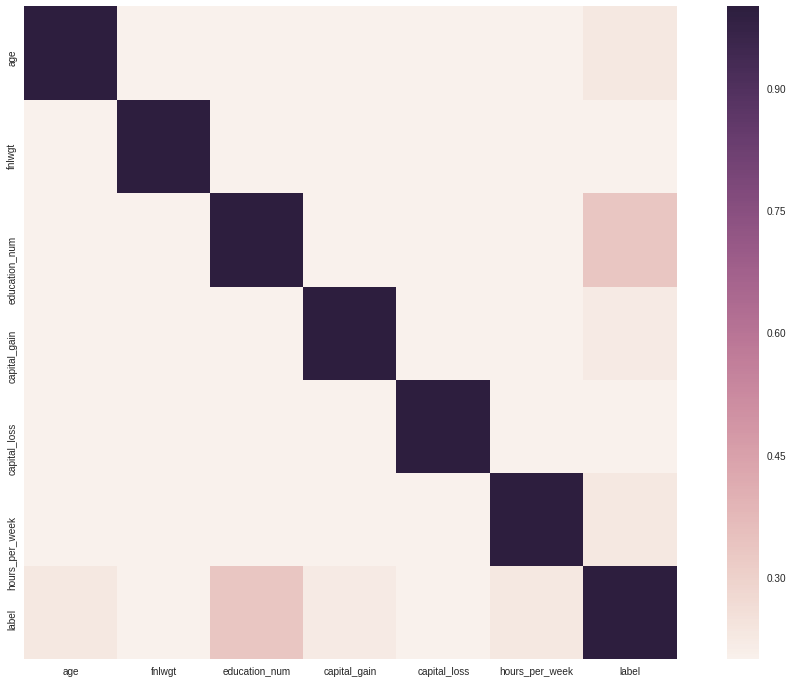

In [23]:
corrmatrix = train.corr(method='pearson')
f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corrmatrix, vmin=0.2, square=True)

In [24]:
largest_corrs = corrmatrix.nlargest(10, 'label')['label']
largest_corrs


label             1.000000
education_num     0.335154
age               0.234037
hours_per_week    0.229689
capital_gain      0.223329
capital_loss      0.150526
fnlwgt           -0.009463
Name: label, dtype: float64


Education_num correlates the most with >50K, followed by age

In [25]:
best_corr_index = largest_corrs[1:5].index
best_corr_index

Index(['education_num', 'age', 'hours_per_week', 'capital_gain'], dtype='object')

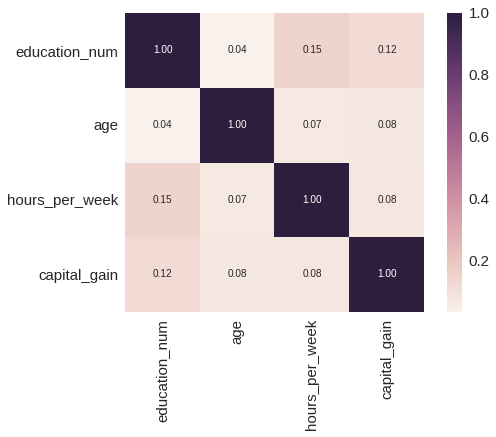

In [26]:
cm = np.corrcoef(train[best_corr_index].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=best_corr_index.values, xticklabels=best_corr_index.values)
plt.show()



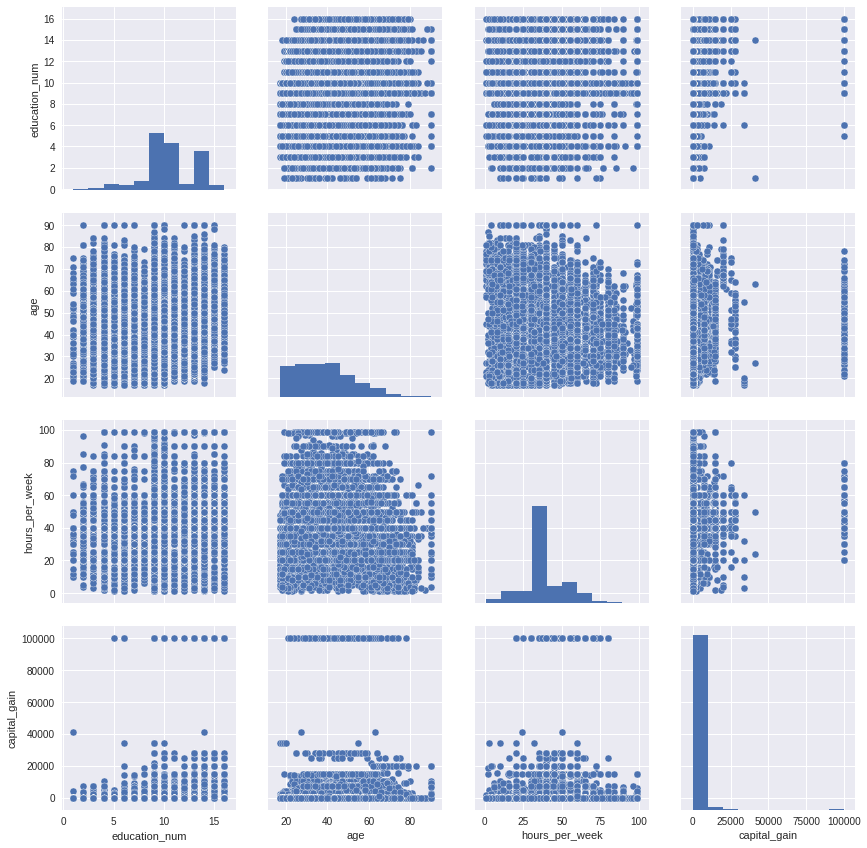

In [27]:
# Scatterplot
sns.set()
sns.pairplot(train[best_corr_index], size=3)
plt.show()

Very small number with a large captial_gain

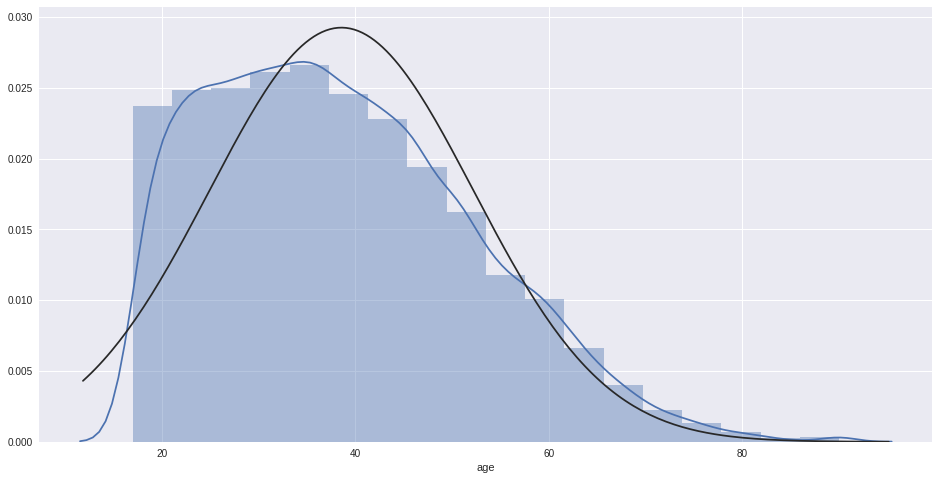

In [28]:
figsize(16,8)
sns.distplot(train['age'], hist=True, bins=int(90/5), fit=norm)

Age is positively skewed

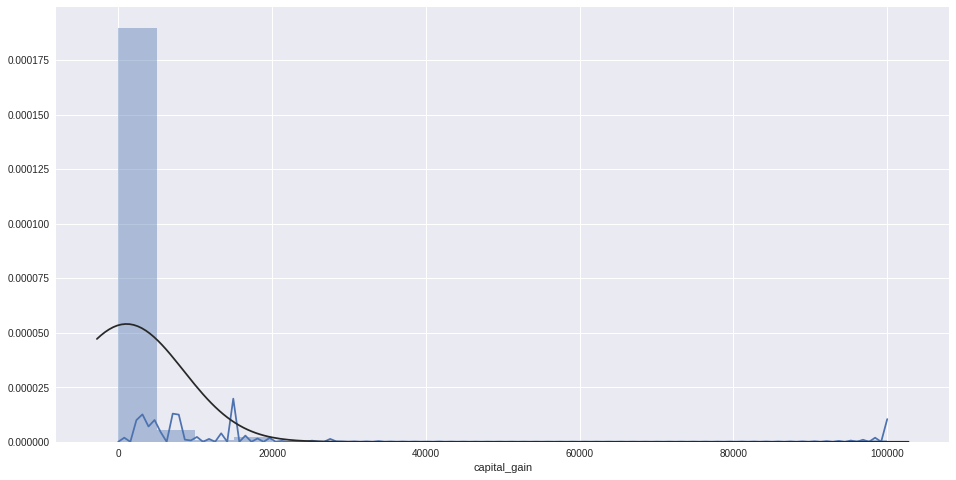

In [29]:
figsize(16,8)
sns.distplot(train['capital_gain'], hist=True, bins=int(100000/5000), fit=norm)

In [30]:
train['capital_gain'][train['capital_gain'] > 80000].count()

159

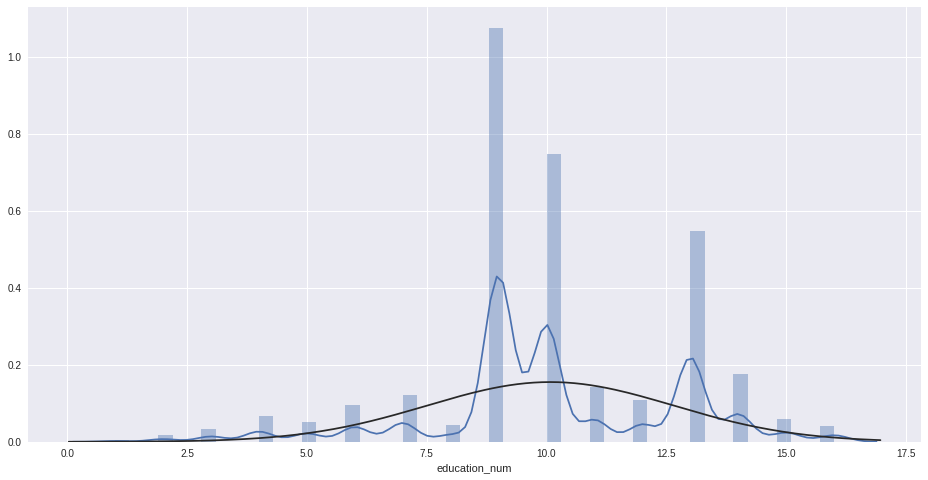

In [31]:
figsize(16,8)
sns.distplot(train['education_num'], hist=True, fit=norm)


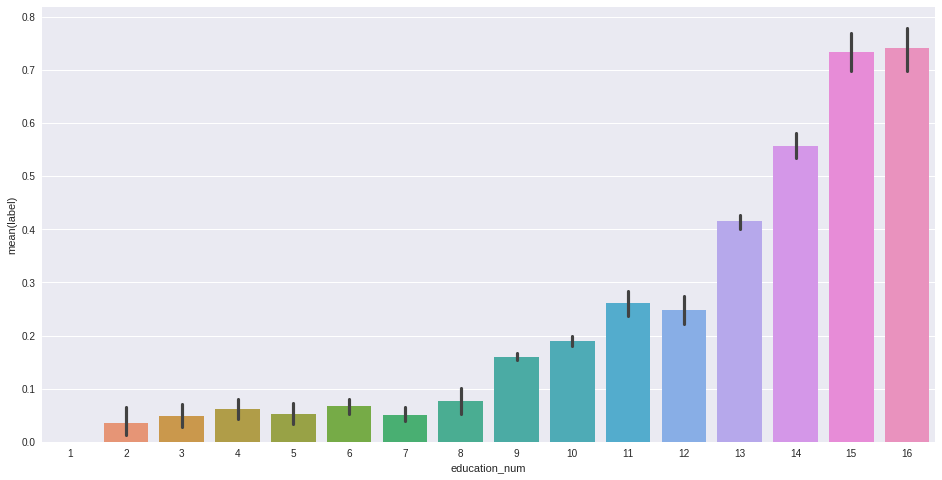

In [32]:
sns.barplot(x='education_num', y='label', data=train)

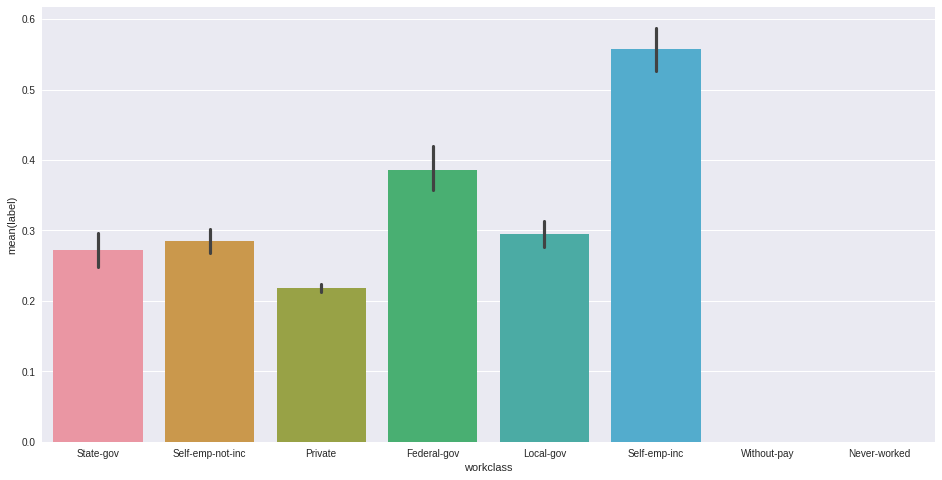

In [33]:
sns.barplot(x='workclass', y='label', data=train)

In [34]:
train['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Might be worth consolidating without-pay and never-worked - not much data for them

In [35]:
train['workclass'].isnull().sum()

1836

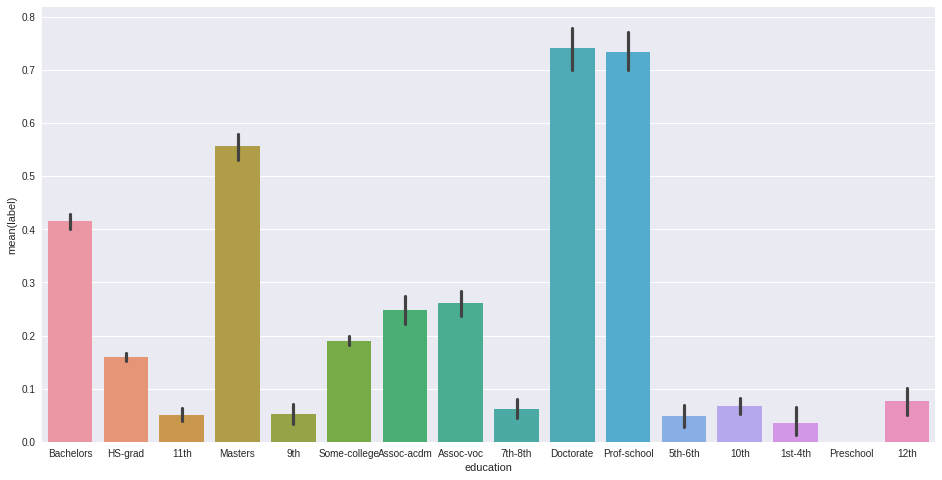

In [36]:
sns.barplot(x='education', y='label', data=train)

In [37]:
train['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Might be worth consolidating all the grade levels and preschool into "school"

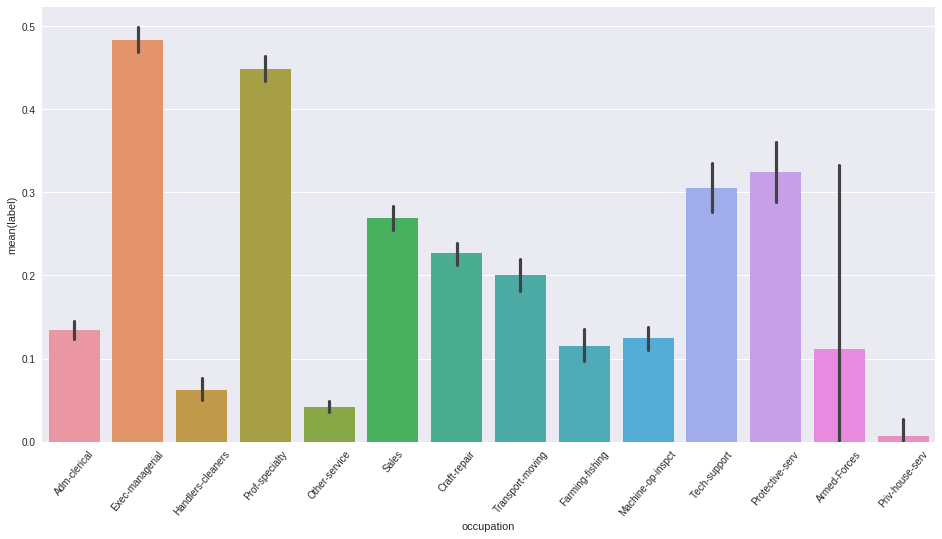

In [38]:
plt.xticks(rotation=50)
sns.barplot(x='occupation', y='label', data=train)

In [39]:
train['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Not many in the Armed Forces

In [40]:
train['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [41]:
train['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [42]:
train['gender'].value_counts()

Male      21790
Female    10771
Name: gender, dtype: int64

In [43]:
train['native_country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

# Data Cleansing

## Drop columns

Remove fnlwgt - although one might consider it an engineered feature.

Education seems represented by education_num

In [0]:
train.drop(['fnlwgt','education'], axis=1, inplace=True)

## Handle Nulls

In [45]:
train.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income_bracket       0
label                0
dtype: int64

In [0]:
train['workclass'].fillna('UNKNOWN', inplace=True)

In [0]:
train['occupation'].fillna('UNKNOWN', inplace=True)

In [0]:
train['native_country'].fillna('UNKNOWN', inplace=True)

## One Hot Encode

In [0]:
train = pd.get_dummies(train)

# Regression

## Split

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 94 columns):
age                                          32561 non-null int64
education_num                                32561 non-null int64
capital_gain                                 32561 non-null int64
capital_loss                                 32561 non-null int64
hours_per_week                               32561 non-null int64
label                                        32561 non-null int64
workclass_Federal-gov                        32561 non-null uint8
workclass_Local-gov                          32561 non-null uint8
workclass_Never-worked                       32561 non-null uint8
workclass_Private                            32561 non-null uint8
workclass_Self-emp-inc                       32561 non-null uint8
workclass_Self-emp-not-inc                   32561 non-null uint8
workclass_State-gov                          32561 non-null uint8
workclass_UNKNOWN                

In [51]:
train2 = train.drop(['income_bracket_<=50K','income_bracket_>50K','label'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(train2, train['label'], random_state=60, test_size=0.2)
(x_train.shape, x_test.shape)

((26048, 91), (6513, 91))

## Standardise / Scale features

In [0]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [0]:
x_test = scaler.transform(x_test)

## Scikit Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [57]:
accuracy_score(y_train_pred, y_train)

0.8527718058968059

In [58]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     19775
           1       0.74      0.61      0.66      6273

   micro avg       0.85      0.85      0.85     26048
   macro avg       0.81      0.77      0.79     26048
weighted avg       0.85      0.85      0.85     26048



In [59]:
accuracy_score(y_test_pred, y_test)

0.84692154153232

In [60]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4945
           1       0.72      0.60      0.65      1568

   micro avg       0.85      0.85      0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



Text(123.0, 0.5, 'Actual')

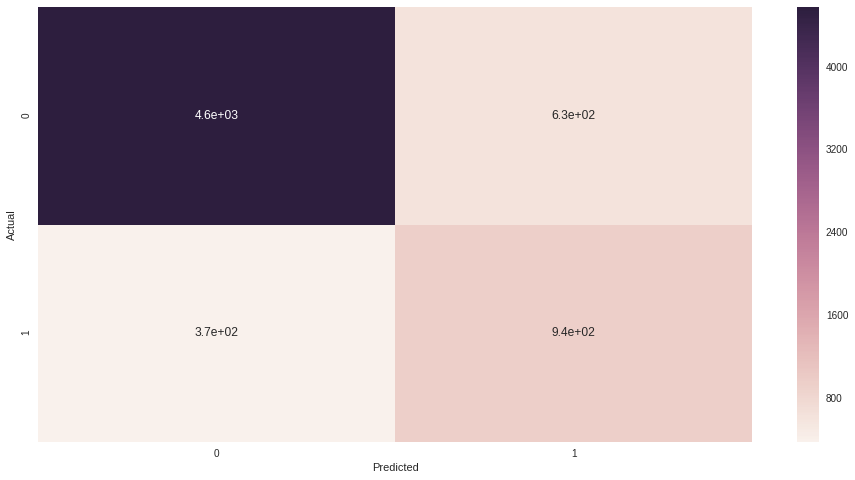

In [61]:
cfm = confusion_matrix(y_test_pred, y_test.values)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Own Logistic Regression

In this assignment, you are expected to implement logistic regression and get a good understanding of the key components of logistic regression:
    
* hypothesis function
* cost function
* decision boundary
* gradient descent algorithm

Finally, compare the result you got from built-in model versus your own implementation on various metrics.

### Background

The logistic regression model is to determine whether a set of inputs is a specific binary classification of 0 or 1.

Y can either be 0 or 1, so that p(y=1) + p(y=0) = 1


#### Linear Regression Background

The **multivariate linear regression equation** is:
- $Y = \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

where:
- $x_0$ = 1
- $\beta$ is the standardised regression coefficients or beta weights applied to each $x$ feature value, including the bias $\beta_0$. $\beta$ weights are the estimates resulting from regression analysis that typically have been standardised so the variances of dependent and independent variables are 1 - i.e. how many standard deviations the dependent (Y) variable changes. 

This reduces to:
- $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

which can also be written as $\beta$ Transpose $x$:
- $Y = \beta^Tx$

where:
- $x$ is the feature vector with $x_0 = 1$

\

The **hypothesis of linear regression** is represented with the unknown parameters $\theta$ instead of $\beta$:
- $h_\theta(x) = \theta_0 + \theta_1 x_1  + \theta_2 x_2  + ... + \theta_n x_n$

Which can be written as $\theta$ Transpose $x$:
- $h_\theta(x) = \theta^Tx$

where: 
- $\theta$ is the regression model's unknown parameter/weight vector for $x_n$, including the bias $\theta_0$
- $x$ is the feature vector with $x_0 = 1$

\

### Logistic Regression Hypothesis Function

There are only two feature values: $x_1$ and $x_2$ in this logistic regression.

The hypothesis function is the estimated probability that y=1 on a given input x, parameterised by $\theta$.

- $h_\theta(x) = \theta_0 + \theta_1 x_1  + \theta_2 x_2$

which can still be written as $\theta$ Transpose $x$:
- $h_\theta(x) = \theta^Tx$

where:
- $x$ is the feature vector with $x_0 = 1$

\

The logistic function being binary means we can use the Sigmoid function to return a value from 0 to 1:
- $h_\theta(x) = \sigma(\theta^Tx)$

And the Sigmoid function is:
- $\sigma(z) =  \frac{1}{1 + e^{-z} }$

And combining the maths, the hypothesis function is:
- $h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}$

where:
- if $\theta^Tx$ > 0, then $h_\theta(x) > 0.5$
- if $\theta^Tx$ < 0, then $h_\theta(x) < 0.5$



\

In the code below, the following terminology is equivalent:
* features
  * x
  * feature vector
  * set of feature values
  * independent variables
  
* weights
  * theta
  * beta
  * beta weights
  * standardised regression coefficients
  
* labels
  * y
  

In [0]:
def sigmoid(z):
  '''
  Returns the sigmoid of z.
  Given the logit (AKA the log of the odds), then the sigmoid inverses the log and returns the original value of the odds.
  '''
  return 1 / (1 + np.exp(-z))


def predict(features, weights):
  '''
  Returns a 1D array of probabilities that the class label is True/Yes/1
  The dot product of the features (True or False) and theta/beta/weights (B_k) will give us the logit(p), which is B0 + B1 True + B2 False
  The sigmoid inverses the logit to give us p, the probability.
  '''
  return sigmoid( np.dot(features, weights) )

### Cost function

Cross entropy / log loss is used in Logistic Regression.

There are two cost functions in logistic regression:
- if y=1 : $cost(h_\theta(x), y) = -log(h_\theta(x))$
- if y=0 : $cost(h_\theta(x), y) = -log(1 - h_\theta(x))$

Note: this means that reducing confident wrong predictions is more beneficial for obtaining a higher score

In [0]:
def cost_function_for_all_training_samples(features, labels, weights):
  m = features.shape[0]  # m = number of samples
  predictions = predict(features, weights)
  return -(1/m) * np.sum( labels*np.log(predictions) + (1-labels)*np.log(1-predictions) )

### Decision boundary

With Sigmoid ranging from 0 to 1, the probability of 0.5 can be used as the decision boundary or threshold to determine the classes.

In [0]:
def decision_boundary(probability, threshold=0.5):
  return 1 if probability >= threshold else 0

### Gradient descent

In [0]:
def calculate_gradient(features, labels, weights):
    predictions = predict(features, weights)
    matrixOfAggregateSlopeOfCostFunction = np.dot(features.T, predictions - labels)
    return matrixOfAggregateSlopeOfCostFunction
  

def update_weights(features, labels, weights, lr):

    matrixOfAggregateSlopeOfCostFunction = calculate_gradient(features, labels, weights)

    m = len(features)
    averageCostDerivativeForEachFeature = matrixOfAggregateSlopeOfCostFunction / m

    gradient = averageCostDerivativeForEachFeature * lr

    return weights - gradient


def fit(features, labels, weights, lr, iterations):

    for i in range(iterations):
        weights = update_weights(features, labels, weights, lr)

        # Log Progress
        if i % 100 == 0:
          cost = cost_function_for_all_training_samples(features, labels, weights)
          print("iteration:", str(i), "cost:", str(cost))

    return weights
  
  
def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  decide = np.vectorize(decision_boundary)
  return decide(predictions).flatten()
  
  

In [115]:
initial_weights = [0] * x_train.shape[1]
lr = 0.2
iterations = 3001

weights = fit(x_train, y_train, initial_weights, lr, iterations)


iteration: 0 cost: 0.6531930836263619
iteration: 100 cost: 0.5163874110808606
iteration: 200 cost: 0.49748797394578625
iteration: 300 cost: 0.48378680860923523
iteration: 400 cost: 0.47315105456094164
iteration: 500 cost: 0.464618801116198
iteration: 600 cost: 0.45763479542089497
iteration: 700 cost: 0.4518387906776774
iteration: 800 cost: 0.4469794882055822
iteration: 900 cost: 0.44287295457161113
iteration: 1000 cost: 0.43937999182135384
iteration: 1100 cost: 0.4363926755751541
iteration: 1200 cost: 0.43382578634465735
iteration: 1300 cost: 0.43161106524694165
iteration: 1400 cost: 0.4296932039478693
iteration: 1500 cost: 0.42802696040626836
iteration: 1600 cost: 0.4265750194396717
iteration: 1700 cost: 0.42530640388797586
iteration: 1800 cost: 0.42419521945810934
iteration: 1900 cost: 0.42321972131542007
iteration: 2000 cost: 0.42236150354609675
iteration: 2100 cost: 0.4216049391462033
iteration: 2200 cost: 0.4209368681492615
iteration: 2300 cost: 0.4203465521781918
iteration: 2400 

In [116]:
y_train_probabilities = predict(x_train, weights).flatten()
y_train_pred = classify(y_train_probabilities)

accuracy_score(y_train_pred, y_train)

0.831426597051597

# Final Result

My regression scored 0.82 and the scikit learn one scored 0.84.

- For 0, this was slightly more precise, but with worse recall and f1-score.
- For 1, this was less precise but had a better recall and f1-score.


In [117]:
y_test_probabilities = predict(x_test, weights).flatten()
y_test_pred = classify(y_test_probabilities)

accuracy_score(y_test_pred, y_test)

0.8246583755565792

In [121]:
# Scikit was this:
#                 precision    recall  f1-score   support
#           0       0.88      0.93      0.90      4945
#           1       0.72      0.60      0.65      1568

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4945
           1       0.62      0.71      0.66      1568

   micro avg       0.82      0.82      0.82      6513
   macro avg       0.76      0.79      0.77      6513
weighted avg       0.83      0.82      0.83      6513



Text(123.0, 0.5, 'Actual')

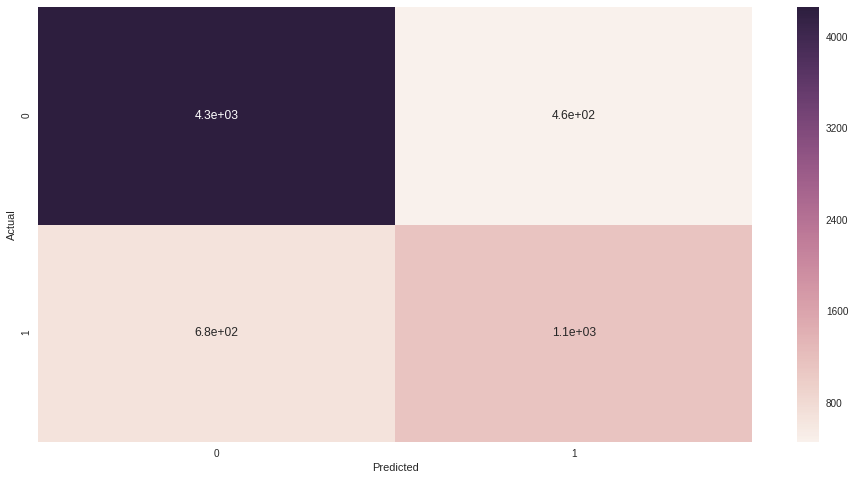

In [119]:
cfm = confusion_matrix(y_test_pred, y_test.values)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')